In [2]:
import numpy as np
import pandas as pd
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import itertools

import torchvision.models as models
import torchvision.transforms as transforms

## ResNet Embedding ---------------------------------------------------------

### Load the Model of Choice

In [3]:
rn50 = models.resnet50(weights='DEFAULT')
rn50.to("cuda")

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
# Edit model to extract final embedding (i.e. "avgpool" layer)
rn50_embed = nn.Sequential(*list(rn50.children())[:-1])
rn50_embed

# '''
#Also achieved by setting final layer as equal to input identity, i.e. avgpool
#> rn50.fc = nn.Identity()
# '''

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


### Load an image and transform

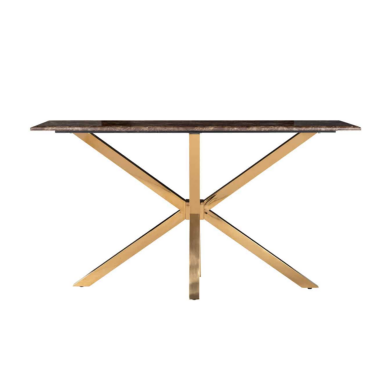

In [5]:
path = "./data/furniture_imgs/table1.jpg"
image = Image.open(path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [6]:
transform = transforms.Compose([
    transforms.Resize(224),
    #transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [7]:
image_trans = transform(image)
image_trans = image_trans.cuda()
image_trans = image_trans.unsqueeze(0)

In [24]:
p = "C:/Users/fergu/Documents/PersonalProjects/Image_Clustering/data/furniture_imgs/table1.jpg"
embedding_1 = rn50_embed(transform(Image.open(p)).cuda().unsqueeze(0))
embedding_1.squeeze().shape

torch.Size([2048])

### Compare images

In [8]:
# initiate consine similarity function
cosine = nn.CosineSimilarity(dim=1)

#### Comparing 2 images

In [54]:
path1 = "./data/furniture_imgs/table1.jpg"
path2 = "./data/furniture_imgs/table2.jpg"

embed1 = rn50_embed(transform(Image.open(path1)).cuda().unsqueeze(0))
embed2 = rn50_embed(transform(Image.open(path2)).cuda().unsqueeze(0))

print(cosine(embed1, embed2)[0])

tensor([[0.6442]], device='cuda:0', grad_fn=<SelectBackward0>)


#### Comparing Multiple Images

In [55]:
path1 = "./data/furniture_imgs/table1.jpg"
path2 = "./data/furniture_imgs/table2.jpg"
path3 = "./data/furniture_imgs/table3.jpg"
path4 = "./data/furniture_imgs/table4.jpg"
path5 = "./data/furniture_imgs/table5.jpg"

embed1 = rn50_embed(transform(Image.open(path1)).cuda().unsqueeze(0))
embed2 = rn50_embed(transform(Image.open(path2)).cuda().unsqueeze(0))
embed3 = rn50_embed(transform(Image.open(path3)).cuda().unsqueeze(0))
embed4 = rn50_embed(transform(Image.open(path4)).cuda().unsqueeze(0))
embed5 = rn50_embed(transform(Image.open(path5)).cuda().unsqueeze(0))

embeddings = {
    path1: embed1,
    path2: embed2,
    path3: embed3,
    path4: embed4,
    path5: embed5
}

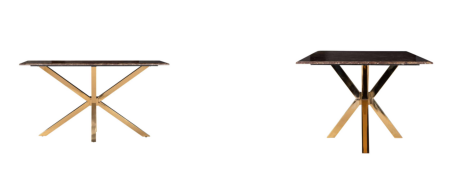

tensor([[0.6442]], device='cuda:0', grad_fn=<SelectBackward0>)


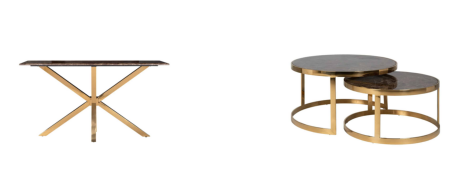

tensor([[0.6072]], device='cuda:0', grad_fn=<SelectBackward0>)


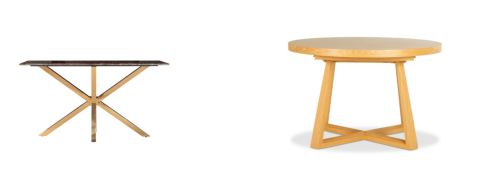

tensor([[0.6369]], device='cuda:0', grad_fn=<SelectBackward0>)


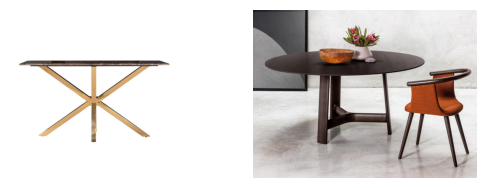

tensor([[0.5717]], device='cuda:0', grad_fn=<SelectBackward0>)


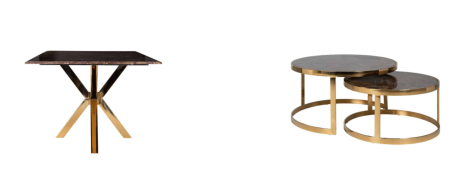

tensor([[0.6181]], device='cuda:0', grad_fn=<SelectBackward0>)


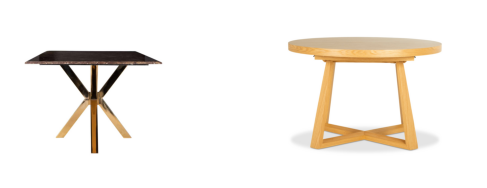

tensor([[0.6619]], device='cuda:0', grad_fn=<SelectBackward0>)


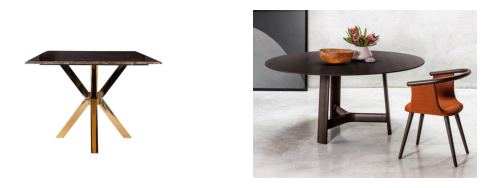

tensor([[0.6008]], device='cuda:0', grad_fn=<SelectBackward0>)


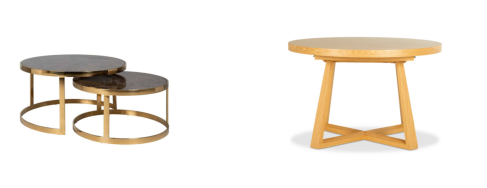

tensor([[0.6512]], device='cuda:0', grad_fn=<SelectBackward0>)


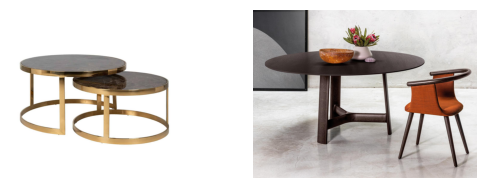

tensor([[0.5794]], device='cuda:0', grad_fn=<SelectBackward0>)


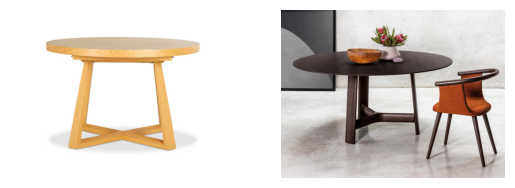

tensor([[0.6930]], device='cuda:0', grad_fn=<SelectBackward0>)


In [56]:
for perm in itertools.combinations(embeddings.keys(), r=2):

    # plot the images
    plt.subplot(2, 2, 1)
    plt.imshow(Image.open(perm[0]))
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(Image.open(perm[1]))
    plt.axis('off')

    plt.show()

    # comput similarity
    print(cosine(embeddings[perm[0]], embeddings[perm[1]])[0])

## VGG Comparison ---------------------------------------------------------

In [57]:
vgg19 = models.vgg19(weights='DEFAULT')
vgg19.to("cuda")

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [62]:
# Edit model to extract final embedding (i.e. "linear" layer in classifier)
vgg19.classifier = vgg19.classifier[:-1]
vgg19

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [63]:
path1 = "./data/furniture_imgs/table1.jpg"
path2 = "./data/furniture_imgs/table2.jpg"
path3 = "./data/furniture_imgs/table3.jpg"
path4 = "./data/furniture_imgs/table4.jpg"
path5 = "./data/furniture_imgs/table5.jpg"

embed1 = vgg19_embed(transform(Image.open(path1)).cuda().unsqueeze(0))
embed2 = vgg19_embed(transform(Image.open(path2)).cuda().unsqueeze(0))
embed3 = vgg19_embed(transform(Image.open(path3)).cuda().unsqueeze(0))
embed4 = vgg19_embed(transform(Image.open(path4)).cuda().unsqueeze(0))
embed5 = vgg19_embed(transform(Image.open(path5)).cuda().unsqueeze(0))

embeddings = {
    path1: embed1,
    path2: embed2,
    path3: embed3,
    path4: embed4,
    path5: embed5
}

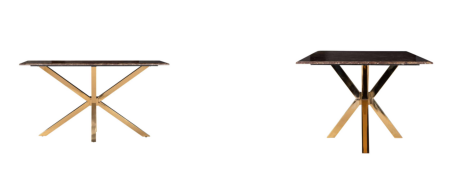

tensor(0.4060, device='cuda:0', grad_fn=<SelectBackward0>)


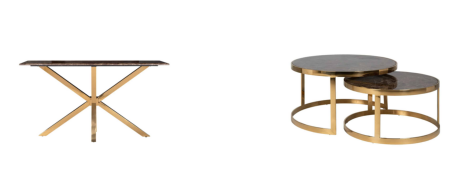

tensor(0.2322, device='cuda:0', grad_fn=<SelectBackward0>)


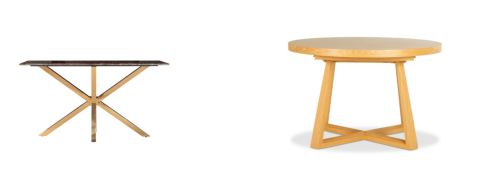

tensor(0.2313, device='cuda:0', grad_fn=<SelectBackward0>)


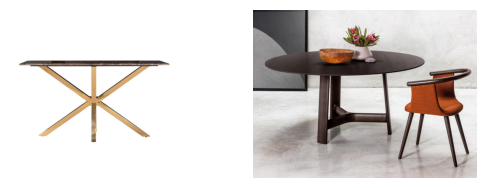

tensor(0.2658, device='cuda:0', grad_fn=<SelectBackward0>)


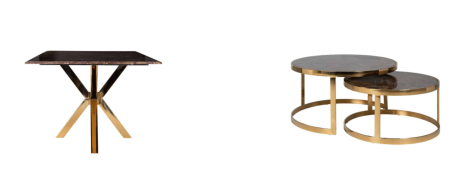

tensor(0.2073, device='cuda:0', grad_fn=<SelectBackward0>)


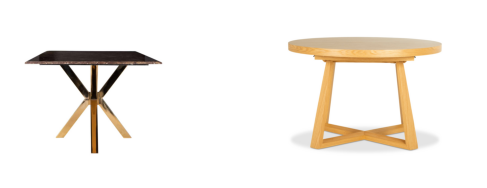

tensor(0.3133, device='cuda:0', grad_fn=<SelectBackward0>)


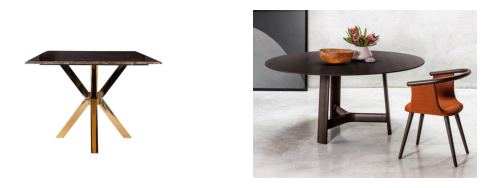

tensor(0.2447, device='cuda:0', grad_fn=<SelectBackward0>)


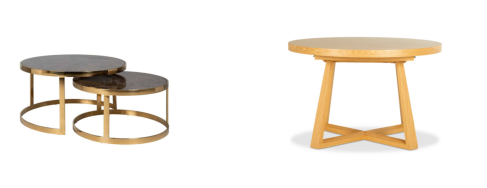

tensor(0.2777, device='cuda:0', grad_fn=<SelectBackward0>)


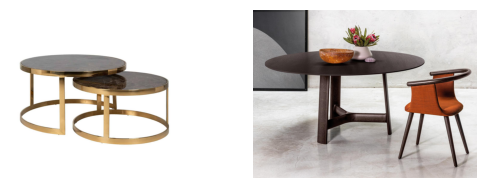

tensor(0.1960, device='cuda:0', grad_fn=<SelectBackward0>)


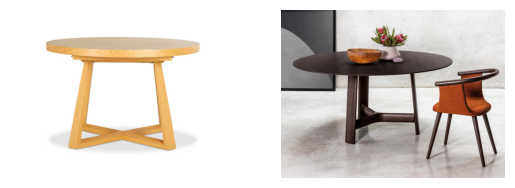

tensor(0.2478, device='cuda:0', grad_fn=<SelectBackward0>)


In [64]:
for perm in itertools.combinations(embeddings.keys(), r=2):

    # plot the images
    plt.subplot(2, 2, 1)
    plt.imshow(Image.open(perm[0]))
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(Image.open(perm[1]))
    plt.axis('off')

    plt.show()

    # comput similarity
    print(cosine(embeddings[perm[0]], embeddings[perm[1]])[0])

## EfficientNet -------------------------------------------------

In [2]:
effnet = models.efficientnet_b0(weights='DEFAULT')
effnet.to("cuda")

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [3]:
# Edit model to extract final embedding (i.e. "linear" layer in classifier)
effnet.classifier = effnet.classifier[:-1]
effnet

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [6]:
path1 = "./data/furniture_imgs/table1.jpg"
path2 = "./data/furniture_imgs/table2.jpg"
path3 = "./data/furniture_imgs/table3.jpg"
path4 = "./data/furniture_imgs/table4.jpg"
path5 = "./data/furniture_imgs/table5.jpg"

embed1 = effnet(transform(Image.open(path1)).cuda().unsqueeze(0))
embed2 = effnet(transform(Image.open(path2)).cuda().unsqueeze(0))
embed3 = effnet(transform(Image.open(path3)).cuda().unsqueeze(0))
embed4 = effnet(transform(Image.open(path4)).cuda().unsqueeze(0))
embed5 = effnet(transform(Image.open(path5)).cuda().unsqueeze(0))

embeddings = {
    path1: embed1,
    path2: embed2,
    path3: embed3,
    path4: embed4,
    path5: embed5
}

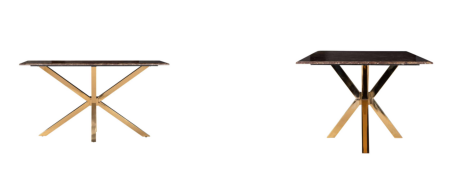

tensor(0.7497, device='cuda:0', grad_fn=<SelectBackward0>)


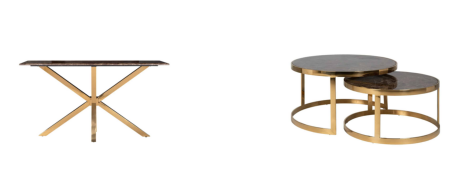

tensor(0.7342, device='cuda:0', grad_fn=<SelectBackward0>)


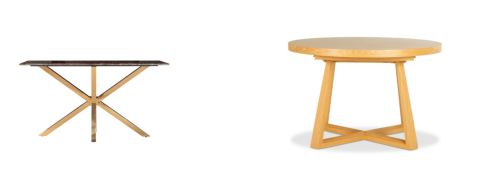

tensor(0.7335, device='cuda:0', grad_fn=<SelectBackward0>)


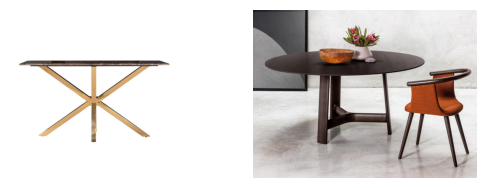

tensor(0.7219, device='cuda:0', grad_fn=<SelectBackward0>)


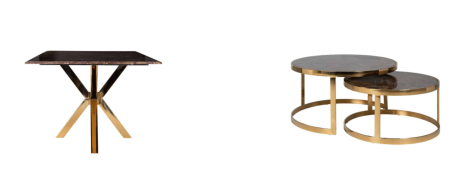

tensor(0.7344, device='cuda:0', grad_fn=<SelectBackward0>)


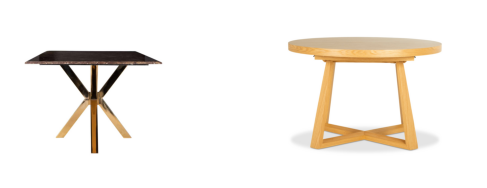

tensor(0.7403, device='cuda:0', grad_fn=<SelectBackward0>)


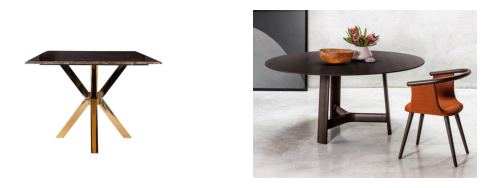

tensor(0.7136, device='cuda:0', grad_fn=<SelectBackward0>)


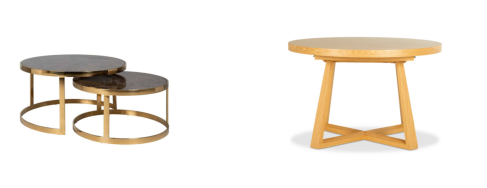

tensor(0.7384, device='cuda:0', grad_fn=<SelectBackward0>)


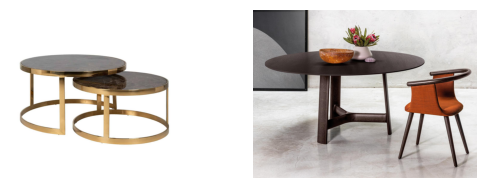

tensor(0.7324, device='cuda:0', grad_fn=<SelectBackward0>)


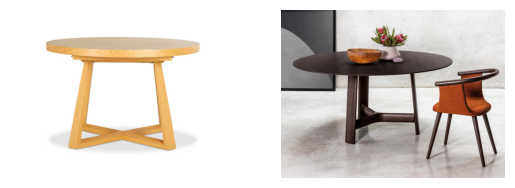

tensor(0.7306, device='cuda:0', grad_fn=<SelectBackward0>)


In [9]:
for perm in itertools.combinations(embeddings.keys(), r=2):

    # plot the images
    plt.subplot(2, 2, 1)
    plt.imshow(Image.open(perm[0]))
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(Image.open(perm[1]))
    plt.axis('off')

    plt.show()

    # comput similarity
    print(cosine(embeddings[perm[0]], embeddings[perm[1]])[0])

In [7]:
def set_device():
    if torch.cuda.is_available():
        device = "cuda:0"
    else:
        device = "cpu"
    
    return device

d = set_device()